In [ ]:
! pip install geopandas matplotlib contextily pandas

In [ ]:
from pathlib import Path
import geopandas as gpd
import pandas as pd

import warnings

import matplotlib.pyplot as plt
import contextily as ctx

warnings.simplefilter("ignore")
base_path = Path()

## Damage Analysis

In this example, we computed the direct flood damages on GB roads based on JBA synthetic event (Thames Lloyd's RDS). Direct damage analysis involves estimating the degree of functionality lost in flood of different severity, the costs related to clean-up and repair of physcial road infrastructure assets that are exposed to flooding, and the estimated recovery time. 

### Direct damage costs estimate

In [ ]:
# load damage cost values
road_links = gpd.read_parquet(
    base_path / "networks" / "GB_road_links_with_bridges.gpq"
)

In [ ]:
# read
intersections_with_damage_final = pd.read_csv(base_path / "intersections17_with_damages_updated.csv")

##### Post-process for visualisation

In [18]:
intersections_with_damage_final = intersections_with_damage_final[intersections_with_damage_final.C6_river_damage_value_mean > 0]
intersections_with_damage_final = intersections_with_damage_final[["e_id"] + intersections_with_damage_final.filter(like="damage_value").columns.tolist()]
road_links_merge  = road_links.merge(intersections_with_damage_final, on="e_id", how="left")
road_links_merge = road_links_merge[road_links_merge.C6_river_damage_value_mean > 0]
road_links_merge.reset_index(drop=True, inplace=True)

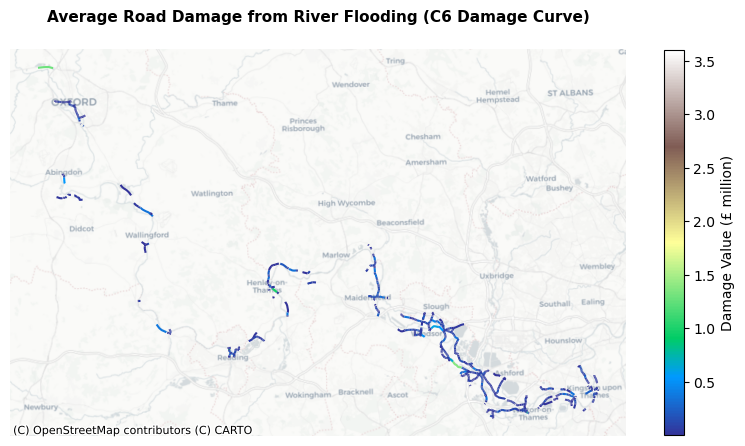

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the road links with damage values
road_links_merge.plot(
    column="C6_river_damage_value_mean",
    cmap="terrain",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": "Damage Value (£ million)",
        "shrink": 0.5,  # Adjusts the size of the color bar
    }
)

# Add grey OSM basemap
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    crs=road_links_merge.crs.to_string()  # Ensure CRS matches
)

ax.set_title("Average Road Damage from River Flooding (C6 Damage Curve)", fontsize=11, fontweight="bold", pad=20)
ax.set_axis_off()